## Reading Data

In [1]:
import pandas as pd
import numpy as np 
import os 
import sklearn as sk
import matplotlib.pyplot as plt

In [2]:
os.chdir(r'C:\Users\ayman\Desktop\ANALYSIS SCIK')
df= pd.read_csv('data.csv')
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


## Data Description and visualisation

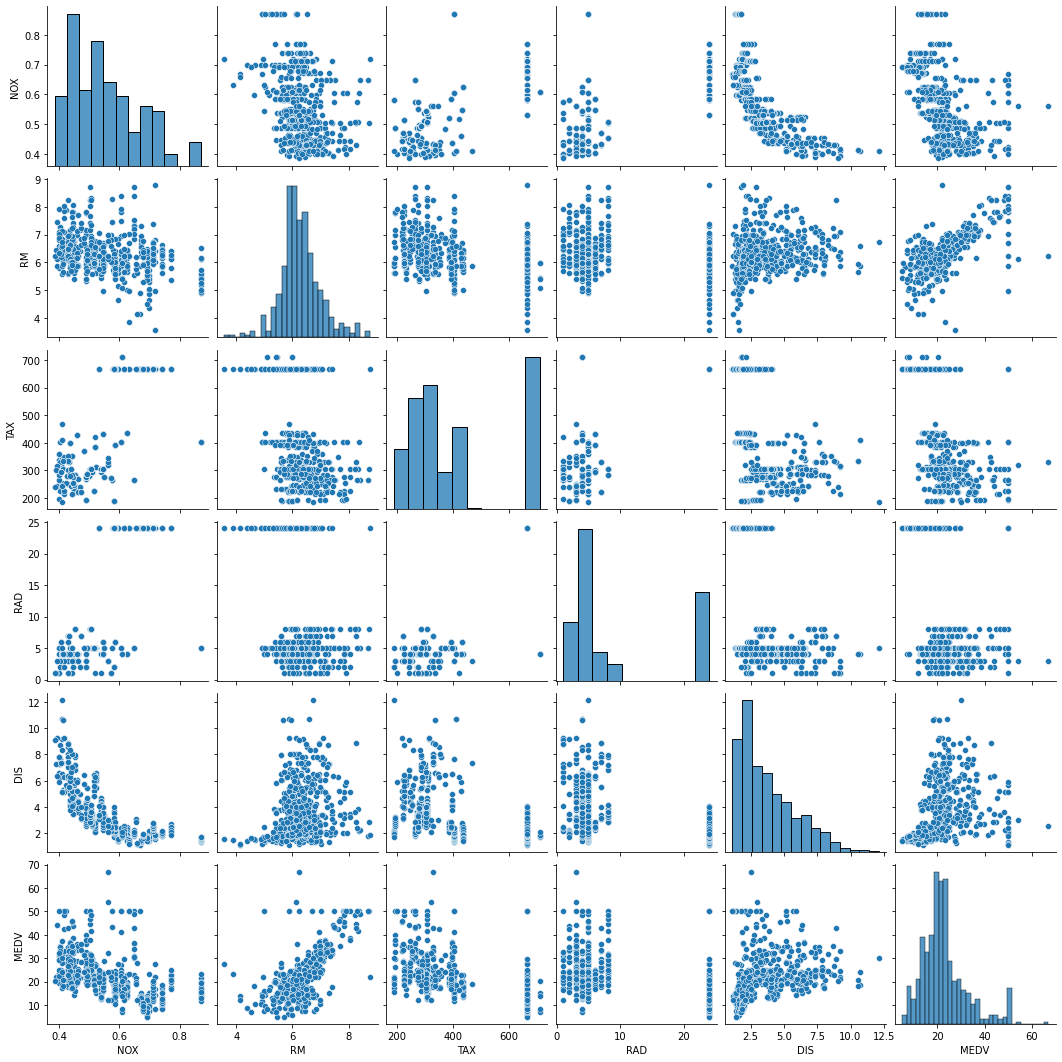

In [3]:
import seaborn as sns
df_2=df[['NOX','RM','TAX','RAD','DIS','MEDV']]
sns.pairplot(df_2)

In [4]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,511.000000,511.000000,511.000000,511.000000,511.000000,506.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000
mean,3.584139,11.252446,11.151096,0.068493,0.554757,6.287589,68.616243,3.783876,9.485323,407.440313,18.500000,356.600900,12.879550,22.682192
std,8.564433,23.234838,6.828175,0.252838,0.115310,0.703802,28.099130,2.098631,8.688469,167.903532,2.200348,90.882679,7.797416,9.484262
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082325,0.000000,5.190000,0.000000,0.449000,5.885500,45.050000,2.100350,4.000000,279.500000,17.400000,374.710000,7.065000,17.050000
50%,0.261690,0.000000,9.690000,0.000000,0.538000,6.209000,77.300000,3.152300,5.000000,330.000000,19.100000,391.340000,11.450000,21.200000
75%,3.621175,12.500000,18.100000,0.000000,0.624000,6.629750,94.050000,5.118000,24.000000,666.000000,20.200000,396.210000,17.105000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,23.000000,396.900000,76.000000,67.000000


CRM: per capita crime rate by town.
ZN: proportion of presidential land zoned for lots over 25,000 sq.ft.
INDUS: proportion of non-retail business acres per town
CHAS: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise.
NOX: nitric oxides concentration (parts per 10 million)
AGE: 
DIS: average number of rooms per dwelling.
RAD: index of accessibility to radial highways
TAX

<AxesSubplot:>

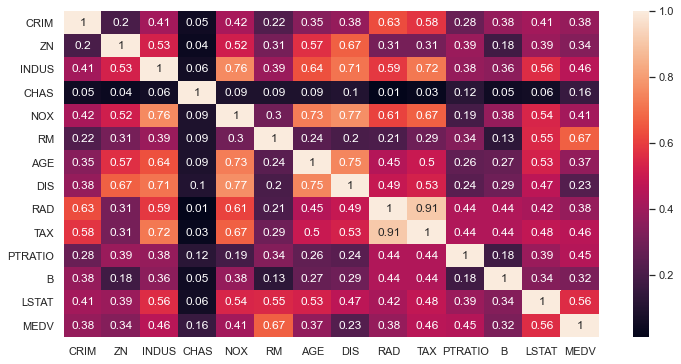

In [5]:
import seaborn as sns
cor_matrix = df.corr().abs().round(2)
sns.set(rc={'figure.figsize':(12,6)})
sns.heatmap(data=cor_matrix , annot=True)

In [6]:
df_copy=df.dropna() ###☻ dropping NA values from the set

## Comparing Model results

In [7]:
from yellowbrick.regressor import prediction_error
from sklearn.model_selection import train_test_split
#### Defining the Observation and Prediction
X=df_copy.iloc[:,:-1]
y=df_copy['MEDV']
#### Splitting data between the training and learning sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)


In [8]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression().fit(X_train, y_train)
print("Training set score: {:.2f}".format(lr.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lr.score(X_test, y_test)))

Training set score: 0.66
Test set score: 0.47


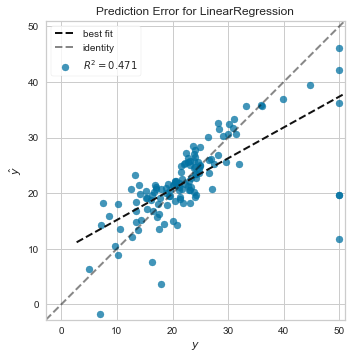

In [9]:
visualizer = prediction_error(LinearRegression(), X_train, y_train, X_test, y_test)

In [10]:
from sklearn.linear_model import Ridge
ridge = Ridge(alpha=10).fit(X_train, y_train)
print("Training set score: {:.2f}".format(ridge.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge.score(X_test, y_test)))

Training set score: 0.66
Test set score: 0.46


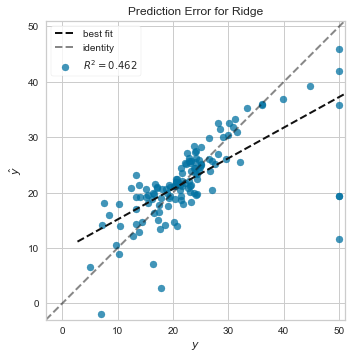

In [11]:
visualizer = prediction_error(Ridge(), X_train, y_train, X_test, y_test)

In [12]:
from sklearn.linear_model import Lasso
lasso = Lasso().fit(X_train, y_train)
print("Training set score: {:.2f}".format(lasso.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso.score(X_test, y_test)))
print("Number of features used: {}".format(np.sum(lasso.coef_ != 0)))

Training set score: 0.62
Test set score: 0.46
Number of features used: 11


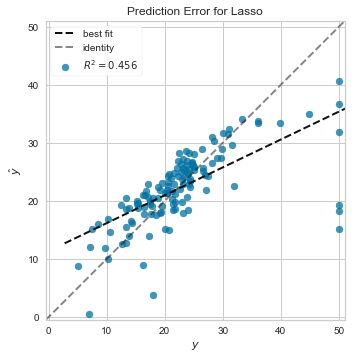

In [13]:
visualizer = prediction_error(Lasso(), X_train, y_train, X_test, y_test)

In [14]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)
rf.fit(X_train,y_train)
print("Training set score: {:.2f}".format(rf.score(X_train,y_train)))
print("Test set score: {:.2f}".format(rf.score(X_test,y_test)))

Training set score: 0.98
Test set score: 0.74


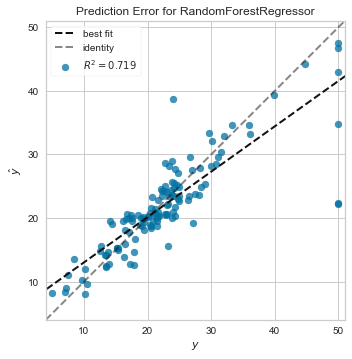

In [17]:
visualizer = prediction_error(RandomForestRegressor(), X_train, y_train, X_test, y_test)

In [30]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
X_train_scaled = StandardScaler().fit_transform(X_train)
X_test_scaled = StandardScaler().fit_transform(X_test)

In [21]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import RepeatedKFold
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
GBR=GradientBoostingRegressor()
search_grid={'n_estimators':[25,50,100,200],'learning_rate':[0.15,0.1,0.05,0.01]}
search=GridSearchCV(estimator=GBR,param_grid=search_grid,scoring='neg_mean_squared_error',n_jobs=1,cv=cv)
search_fit = search.fit(X_train_scaled, y_train)
best_model_gbr = search_fit.best_estimator_

In [22]:
print("Training set score: {:.2f}".format(best_model_gbr.score(X_train_scaled,y_train)))
print("Test set score: {:.2f}".format(best_model_gbr.score(X_test_scaled,y_test)))

Training set score: 0.99
Test set score: 0.75


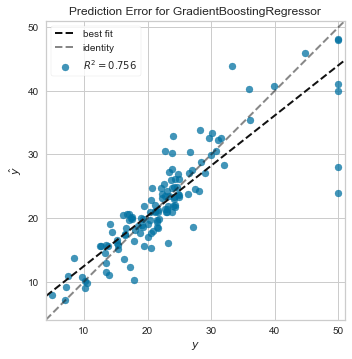

In [24]:
visualizer = prediction_error(GradientBoostingRegressor(), X_train_scaled, y_train, X_test_scaled, y_test)

MSE train 0.73
MAE train 0.68
RMSE train 0.85
MSE test 20.07
MAE test 2.8
RMSE test 4.48
GradientBoostingRegressor(n_estimators=200)


Text(0.5, 1.0, 'Plot of variable improtance for GBR')

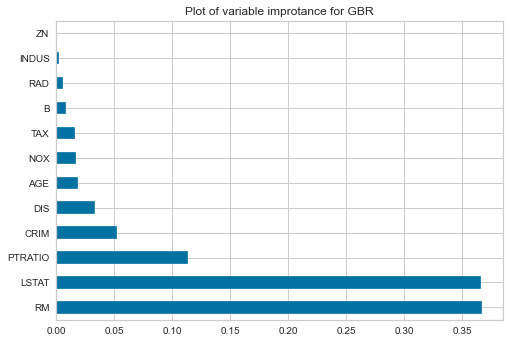

In [36]:
from sklearn.metrics import mean_absolute_error,mean_squared_error
x_names = df.columns[0:13]
y_pred_train3 = best_model_gbr.predict(X_train_scaled)
print("MSE train", round(mean_squared_error(y_train,y_pred_train3),2))
print("MAE train", round(mean_absolute_error(y_train,y_pred_train3),2))
print("RMSE train", round(np.sqrt(mean_squared_error(y_train,y_pred_train3)),2))
y_pred_test3 = best_model_gbr.predict(X_test_scaled)
print("MSE test", round(mean_squared_error(y_test,y_pred_test3),2))
print("MAE test", round(mean_absolute_error(y_test,y_pred_test3),2))
print("RMSE test", round(np.sqrt(mean_squared_error(y_test,y_pred_test3)),2))
print(best_model_gbr)
pd.Series(abs(best_model_gbr.feature_importances_), index=x_names).nlargest(12).plot(kind='barh')
plt.title("Plot of variable improtance for GBR")